# Binary Classification for Predicting Legendary Pokemon 


In [2]:
import numpy as np 

 # Libraries for data manipulation and analysis 
import pandas as pd 
import seaborn as sns 

# Libraries for data preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import Dataset 

# Libraries for model building
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Adam 

# Evaluation Libraries
from sklearn.metrics import confusion_matrix

# Visualisation Libraries 
from PIL import Image 


In [3]:
# Read the csv file to get data

dataset = pd.read_csv('pokemon.csv')
print(dataset.shape)    
dataset.head() 


(801, 41)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


<Axes: xlabel='is_legendary', ylabel='count'>

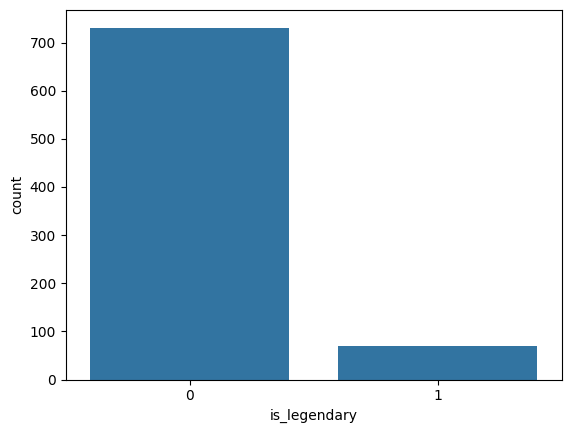

In [4]:
# Visualise distribution of non-legendary vs legendary 
sns.countplot(x='is_legendary', data = dataset)

In [5]:
# Data cleaning process

# Drop categorical features as we are only interested in numerical features
dataset_cleaned = dataset.select_dtypes(exclude=['object'])

# Drop pokedex_number and percentage_male columns
dataset_cleaned = dataset_cleaned.drop(['pokedex_number', 'percentage_male'], axis=1)

# Drop empty values
dataset_cleaned = dataset_cleaned.dropna()

print(dataset_cleaned.shape)
dataset_cleaned.head()

(781, 32)


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,defense,experience_growth,height_m,hp,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,49,1059860,0.7,45,65,65,45,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,63,1059860,1.0,60,80,80,60,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,123,1059860,2.0,80,122,120,80,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,43,1059860,0.6,39,60,50,65,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,1059860,1.1,58,80,65,80,19.0,1,0


I dropped the pokedex_number column, since each pokemon has a unique value, and we cannot gain any information through this in training. 

perecentage_male column was dropped since a lot of the legendary pokemon have nan values for this feature.




<Axes: xlabel='is_legendary', ylabel='count'>

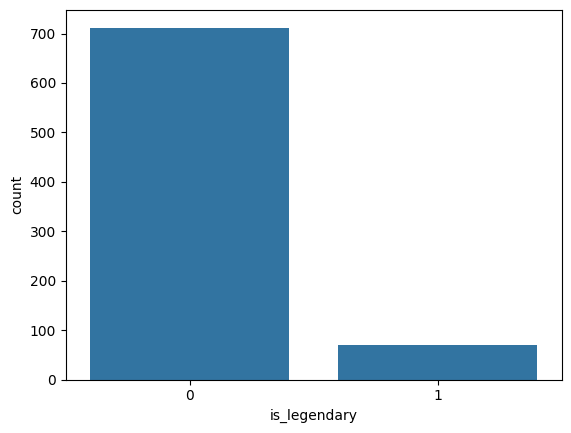

In [6]:
# View new dataset

sns.countplot(x='is_legendary', data = dataset_cleaned)

In [7]:
# Split dataset into inputs and labels 

# Include every column except legendary column, for testing (labels)
X = dataset_cleaned.iloc[:, :-1]

# For testing
y = dataset_cleaned.iloc[:,-1]


In [8]:
# Use sk learn to split the data into tran and test with 33% test size 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50, stratify=y)

# Here stratify ensures we have an equal distribution of legendary pokemon in both train and test set. 

print(y_train.describe())
print(y_test.describe())

count    523.000000
mean       0.087954
std        0.283499
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: is_legendary, dtype: float64
count    258.000000
mean       0.089147
std        0.285510
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: is_legendary, dtype: float64


In [9]:
# Now convert pd Dataframes to numpy

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [10]:
X_train[0], y_train[0]

(array([5.00e-01, 5.00e-01, 1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        1.00e+00, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 2.00e+00, 5.00e-01, 1.00e+00, 1.00e+00,
        1.05e+02, 6.40e+03, 7.00e+01, 4.55e+02, 7.90e+01, 1.00e+06,
        1.40e+00, 5.00e+01, 3.50e+01, 1.10e+02, 7.60e+01, 5.02e+01,
        1.00e+00]),
 np.int64(0))

In [11]:
# Standardize/Normalize the data to improve performance, and for simpler analysis

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Important to use transform instead of fit_transform here b/c we want to use the same standardization fit used for the training set
X_test = scaler.transform(X_test)

In [12]:
# Notice how these values are different from the train values above, bc of the standardization
X_train[0], y_train[0] 

(array([-0.81431447, -1.26506109,  0.10924247, -0.16563385,  1.70932293,
        -0.04083918, -0.19021243,  1.34717605,  0.00340933, -0.01486738,
        -0.12566478, -0.23540795,  0.42324234,  0.03702334,  2.03659863,
        -1.08240132,  0.06097932, -0.04888487,  0.8428991 , -0.11931975,
         0.23232965,  0.21772524,  0.18826924, -0.31415022,  0.37595139,
        -0.71162284, -1.15118603,  1.37820964,  0.36020001, -0.08727452,
        -1.49309528]),
 np.int64(0))

In [13]:
# Build dataset class

#train  data

class TrainData(Dataset):

    def __init__(self, X_data, y_data):
        self.x_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        #length of whole dataset
        return len(self.x_data)
        

train_data = TrainData(torch.FloatTensor(X_train), torch.FloatTensor(y_train))


#test data

class TestData(Dataset):

    def __init__(self, X_data):
        self.x_data = X_data
        #or self.x_data = X_test
       

    def __getitem__(self, index):
        return self.x_data[index]
    
    def __len__(self):
        #length of whole dataset
        return len(self.x_data)
        

test_data = TestData(torch.FloatTensor(X_test))


In [17]:
## Hyperparameter cell

HIDDEN_SIZE = 64


# training 
EPOCHS = 20
BATCH_SIZE = 32
LEARNING_RATE = 0.001

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [22]:
# Build dataloader 

train_loader = DataLoader(dataset=train_data, batch_size = BATCH_SIZE)

# Test with one input at a time
test_loader = DataLoader(dataset=test_data, batch_size = 1)


In [15]:
# Define boilerplate model with neural networks 

class PokemonModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        

        super(PokemonModel, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size) # 1st linear layer
        self.relu1 = nn.ReLU() # activation layer 
        self.batchnorm1 = nn.BatchNorm1d(hidden_size)
        self.l2 = nn.Linear(hidden_size, hidden_size) #2nd li ear layer 
        self.relu2 = nn.ReLU()
        self.batchnorm2 = nn.BatchNorm1d(hidden_size)
        self.dropout = nn.Dropout(0.1)
        self.out = nn.Linear(hidden_size, 1) # output layer predicting either 0 or 1 

    def forward(self, x):
        x = self.l1(x)
        x = self.relu1(x)
        x = self.batchnorm1(x)
        x = self.l2(x)
        x = self.relu2(x)
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.out(x)
        return x


In [19]:
# Initialize model

model = PokemonModel(input_size=X_train.shape[1], hidden_size= HIDDEN_SIZE) 
model.to(device) # push model to device (cpu here)

#Define loss function and optimizer 

criterion = nn.BCEWithLogitsLoss() # cross entropy loss

optimizer = Adam(model.parameters(), lr = LEARNING_RATE)

model

PokemonModel(
  (l1): Linear(in_features=31, out_features=64, bias=True)
  (relu1): ReLU()
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l2): Linear(in_features=64, out_features=64, bias=True)
  (relu2): ReLU()
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (out): Linear(in_features=64, out_features=1, bias=True)
)

In [24]:
# Defining accuracy evaluation function

def binary_acc(y_pred, y_test):

    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()

    acc = correct_results_sum/y_test.shape[0] # 258 samples in this case as seen in the count of oneof the cells aboce
    acc = torch.round(acc * 100)

    return acc

In [25]:
model.train() # Only really needed for dropout and batchnorm layers

for e in range(1, EPOCHS + 1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad() # needed to reset gradient at each step

        y_pred = model(X_batch) # prediction of our model for the batch

        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1)) # compute accuracy of each batch using the loss

        loss.backward()
        optimizer.step() # back propogating?!

        #For evaluating if the model increases with each epoch
        epoch_loss += loss.item()
        epoch_acc += acc.item()

    print(f'Epoch {e:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')


Epoch 001: | Loss: 0.59671 | Acc: 71.471
Epoch 002: | Loss: 0.48159 | Acc: 86.353
Epoch 003: | Loss: 0.41458 | Acc: 90.706
Epoch 004: | Loss: 0.36811 | Acc: 92.882
Epoch 005: | Loss: 0.31057 | Acc: 94.471
Epoch 006: | Loss: 0.26226 | Acc: 95.941
Epoch 007: | Loss: 0.21537 | Acc: 97.529
Epoch 008: | Loss: 0.17737 | Acc: 98.059
Epoch 009: | Loss: 0.15034 | Acc: 99.118
Epoch 010: | Loss: 0.12665 | Acc: 98.412
Epoch 011: | Loss: 0.10182 | Acc: 99.294
Epoch 012: | Loss: 0.08618 | Acc: 99.471
Epoch 013: | Loss: 0.07103 | Acc: 99.471
Epoch 014: | Loss: 0.05765 | Acc: 99.824
Epoch 015: | Loss: 0.05062 | Acc: 99.647
Epoch 016: | Loss: 0.04106 | Acc: 100.000
Epoch 017: | Loss: 0.03607 | Acc: 100.000
Epoch 018: | Loss: 0.03037 | Acc: 100.000
Epoch 019: | Loss: 0.02701 | Acc: 100.000
Epoch 020: | Loss: 0.02417 | Acc: 100.000


In [27]:
y_pred_list = []

model.eval()
with torch.no_grad():
    for X_batch in test_loader: #test loader has batch size one remember
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred) #between 0 and 1
        y_pred_tag = torch.round(y_test_pred) # rounds to either 0 or 1 to predict legendary status
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [i.squeeze().tolist() for i in y_pred_list] #reformat list for clarity



In [36]:
CM = confusion_matrix(y_test, y_pred_list)

print(CM)

accuracy = (CM[0,0] + CM[1,1])/ (CM[0,0] + CM[1,1] + CM[1,0] + CM[0,1])

print(accuracy)

[[232   3]
 [  2  21]]
0.9806201550387597


This confusion matrix tells us that there are
 232 true negatives and 3 false positives,
 2 false negatives and 21 true positives